In [1]:
from konlpy.tag import Okt

okt = Okt()
text = "파싱은 프로그램을 compile하는 과정에서 특정 프로그래밍 언어가 제시하는 문법을 잘 지켜서 작성하였는지 compiler가 검사하는 것이다."
nounlist = okt.nouns(text)
morphslist = okt.morphs(text)
pos1 = okt.pos(text, norm=True, stem=True) #정규화, 원형
pos2 = okt.pos(text, norm=True, stem=True, join=True)

print(nounlist,'\n')
print(morphslist,'\n')
print(pos1,'\n')
print(pos2,'\n')

['파싱', '프로그램', '과정', '특정', '프로그래밍', '언어', '제시', '문법', '작성', '검사', '것'] 

['파싱', '은', '프로그램', '을', 'compile', '하는', '과정', '에서', '특정', '프로그래밍', '언어', '가', '제시', '하는', '문법', '을', '잘', '지켜서', '작성', '하였는지', 'compiler', '가', '검사', '하는', '것', '이다', '.'] 

[('파싱', 'Noun'), ('은', 'Josa'), ('프로그램', 'Noun'), ('을', 'Josa'), ('compile', 'Alpha'), ('하다', 'Verb'), ('과정', 'Noun'), ('에서', 'Josa'), ('특정', 'Noun'), ('프로그래밍', 'Noun'), ('언어', 'Noun'), ('가', 'Josa'), ('제시', 'Noun'), ('하다', 'Verb'), ('문법', 'Noun'), ('을', 'Josa'), ('자다', 'Verb'), ('지키다', 'Verb'), ('작성', 'Noun'), ('하다', 'Verb'), ('compiler', 'Alpha'), ('가다', 'Verb'), ('검사', 'Noun'), ('하다', 'Verb'), ('것', 'Noun'), ('이다', 'Josa'), ('.', 'Punctuation')] 

['파싱/Noun', '은/Josa', '프로그램/Noun', '을/Josa', 'compile/Alpha', '하다/Verb', '과정/Noun', '에서/Josa', '특정/Noun', '프로그래밍/Noun', '언어/Noun', '가/Josa', '제시/Noun', '하다/Verb', '문법/Noun', '을/Josa', '자다/Verb', '지키다/Verb', '작성/Noun', '하다/Verb', 'compiler/Alpha', '가다/Verb', '검사/Noun', '하다/Verb', '것/Noun', '이다/Jo

주어진 text에 대하여 아래와 같은 작업을 수행하세요.(20점)
- 정규표현식을 사용하여 한글 외 모두 삭제하는 전처리
- 형태소로 변환하고 명사만 선별하여 리스트로 출력

text = "삼성전자가 마냥 웃을 수 있는 상황은 아니다. 원래 스마트폰 시장에서 영업이익은 애플이 3분의 2 이상 독식하지만 
시장 점유율만큼은 삼성전자가 수년째 1위를 지켜왔다. 애플은 아이폰을 출시하는 4분기에만 
‘반짝’ 점유율이 높을 뿐 다른 분기에는 삼성전자와 화웨이에 밀렸다. 그런데 지난해 화웨이가 미국의 제재를 받고 
중국 외에선 힘을 잃는 변수가 생겼다. 이후 프리미엄 시장에선 삼성전자보다 애플이, 중저가 시장에선 삼성전자보다 
샤오미가 큰 반사이익을 봤다. 게다가 애플은 지난해 상반기 출시한 50만원대 보급폰 아이폰SE가 지난해 스마트폰 
판매량 2위에 오르고, 하반기 출시한 아이폰12가 ‘역대급’ 흥행몰이를 했다. 그 효과가 올해로 이어지면서 
삼성전자는 갤럭시S 신제품을 출시하고도 1분기 점유율 1위 자리를 애플에 위협받고 있는 것이다. 
애플은 올해 아이폰SE 신작인 ‘아이폰SE플러스’ 출시를 검토하고 있다."

In [2]:
import re
text = """삼성전자가 마냥 웃을 수 있는 상황은 아니다. 원래 스마트폰 시장에서 영업이익은 애플이 3분의 2 이상 독식하지만 
시장 점유율만큼은 삼성전자가 수년째 1위를 지켜왔다. 애플은 아이폰을 출시하는 4분기에만 
‘반짝’ 점유율이 높을 뿐 다른 분기에는 삼성전자와 화웨이에 밀렸다. 그런데 지난해 화웨이가 미국의 제재를 받고 
중국 외에선 힘을 잃는 변수가 생겼다. 이후 프리미엄 시장에선 삼성전자보다 애플이, 중저가 시장에선 삼성전자보다 
샤오미가 큰 반사이익을 봤다. 게다가 애플은 지난해 상반기 출시한 50만원대 보급폰 아이폰SE가 지난해 스마트폰 
판매량 2위에 오르고, 하반기 출시한 아이폰12가 ‘역대급’ 흥행몰이를 했다. 그 효과가 올해로 이어지면서 
삼성전자는 갤럭시S 신제품을 출시하고도 1분기 점유율 1위 자리를 애플에 위협받고 있는 것이다. 
애플은 올해 아이폰SE 신작인 ‘아이폰SE플러스’ 출시를 검토하고 있다."""

text1 = " ".join(re.compile('[가-힣]+').findall(text))
nounlist = okt.nouns(text)
morphslist = okt.morphs(text)
pos1 = okt.pos(text, norm=True, stem=True)
pos2 = okt.pos(text1, norm=True, stem=True, join=True)

li = []
for i in pos1:
    if 'Noun' in i[1]:
        li.append(i[0])
    else:pass
print(li)

['전자', '마냥', '웃', '수', '상황', '원래', '스마트폰', '시장', '영업', '이익', '애플', '이상', '독식', '시장', '점유', '율', '전자', '수년', '위', '애플', '아이폰', '출시', '반짝', '점유', '율', '뿐', '다른', '분기', '전자', '화웨이', '지난해', '화웨이', '미국', '제재', '중국', '외', '힘', '변수', '이후', '프리미엄', '시장', '전자', '애플', '중', '저가', '시장', '전자', '샤오미', '이익', '게다가', '애플', '지난해', '상반기', '출시', '보급', '폰', '아이폰', '지난해', '스마트폰', '판매량', '위', '하반기', '출시', '아이폰', '역대', '흥행', '몰이', '그', '효과', '올해', '전자', '갤럭시', '신제품', '출시', '점유', '율', '위', '자리', '애플', '위협', '것', '애플', '올해', '아이폰', '신작', '아이폰', '플러스', '출시', '검토']


dataset/영화 기생충_review.txt' 문서를 불러와서 아래 사항을 수행하세요.(30점)
- 정규표현식을 이용해서 한글 단어외 모두 삭제 처리(사용자 함수 cleanText(readData) 작성하여 활용)
- 정제된 문서에서 명사, 동사, 형용사만 단어 리스트로 추출
- 단어 빈도 분석 후 빈도수에서 Top 10 단어를 막대 그래프로 시각화


In [3]:
import pandas as pd
from konlpy.tag import Okt

with open('./dataset/영화 기생충_review.txt','r',encoding='cp949') as f:
    data = f.read()
print(data)

별1개  준 사람들은   나베당임
역쉬
영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..
지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!
대단한 영화. 몰입력 장난아님. 후아
그닥
칸하고 안맞나봄.
봉준호식의 코메디와 사회비판 페이소스
좋았습니다
군더더기 없이 깔끔한 영화, 지금도 영화가 주는 메세지를 생각하는 중입니다
볼만 했어요
막 조조보고 나옴. 기가 막힌 블랙코미디. 시간 가는줄 모르고 집중하게 됨..보고 나서 더 생각나는 영화.여지껏 봉준호 영화 중 최고다
전  재미었어요.생각 하게끔 만드는 영화
올만에 한국영화 강추
영화가 끝나고 생각함을 주는영화
이건 진짜 봉준호 천재~~
김태호 무한도전보고 천재라  생각했는데..
다른분야 같은 레벨~!!
더불어 살 순 없을까 ㅠㅠ
블랙코미디 굉장히 찝찝하고 숙연해진다
나름
몰입!
기대하고 갔는데
개인적으로 별로다 
불편하다
시간가는 줄 모르고 정말 재밌게 봤습니다.
풍자를 기가막히게 잘 표현한 것 같습니다.
아마 2019년 최고작
송강호 나오면 무조건 보는데 역시나 믿고 보는 배우 역시 한국인들 대단해 방탄에 이어 영화까지 세계인의 마음을 사로잡다
good
일반국민이던  배충이던  모두봐야할  영화
칸영화제 수상과는 별개로...... 개인적으로 영화가 끝나고 기립박수를 치고 싶었습니다
봉준호 감독님에게 경의를 표하고 싶습니다.
당장은 어렵더라도. 기우의 바램이 이루어지는 세상을 향해.
뉴스로 닿지 않을 것을 전달해내는 과연 봉테일.
묵직하게. 잘 받았습니다, 오버.
두번 다시 봉준호 영화는 거른다..!!
재밌어요~
재미있고 상징적인 상업영화인데
행위예술같은 고급스러움도 있어요~
물론 반지하 장면은 좀 지저분하지만
그게 현실이니까
너무 재밌게 봤고 두번은 더 볼꺼예요~♡♡
오랜만에 잘 만들어진 영화를 봤네요~.
대사 중에 불필요한 ㅇㅅ이 많아서 아쉬웠음
글쎄..........
503  최순실 잔당이 블랙리스트로 말려 죽이려한 감독과 대배우. 그들에게 최고의 명예를 

In [19]:
def cleanText(readdata):
    text = re.sub('[0-9]+','',readdata)
    text = re.sub('[A-Za-z]+','',text)
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]+','',text)
    # text = re.sub('[^가-힣]+',' ',readdata)
    return text
text = cleanText(data)

morph = okt.pos(text)
word_list = []
for word, tag in morph:
    if (tag=='Noun') or (tag=='Verb') or (tag == 'Adjective'):
        word_list.append(word)

print(word_list[:100])

['별개', '준', '사람', '나', '베당', '임', '역쉬', '영화', '끝나고', '가슴', '먹', '먹하고', '답답햇습니', '충격', '이었습니다', '지금', '나온', '감독', '모든', '작품', '압축', '되어있다는', '느낌', '받음', '대단한', '영화', '몰입', '장난', '아님', '후', '그닥', '칸', '맞나', '봄', '봉준호', '코메디', '사회', '비판', '페이소스', '좋았습니다', '군더더기', '깔끔한', '영화', '지금', '영화', '주는', '메세지', '생각', '하는', '중', '입니다', '볼', '했어요', '막', '조조', '보고', '나옴', '기', '막힌', '블랙코미디', '시간', '가는줄', '모르고', '집중', '하게', '됨', '보고', '나서', '더', '생각나는', '영화', '여지', '껏', '봉준호', '영화', '중', '최고다', '전', '재', '미었어요', '생각', '하게', '끔', '만드는', '영화', '올만에', '한국영', '강추', '영화', '끝나고', '생각', '함', '주는', '영화', '이건', '진짜', '봉준호', '천재', '김태호', '무한도전']


In [5]:
from collections import Counter
count = Counter(word_list)
n_words = dict(count.most_common())
print(n_words)

{'영화': 497, '봉준호': 138, '감독': 126, '생각': 122, '하는': 78, '기생충': 78, '것': 72, '연기': 66, '그': 65, '잘': 64, '보고': 60, '송강호': 60, '현실': 57, '배우': 54, '기대': 54, '작품': 53, '사람': 51, '역시': 48, '이': 48, '없는': 48, '더': 47, '최고': 47, '장면': 47, '상': 46, '하게': 45, '수': 45, '우리': 44, '봉': 41, '황금종려상': 41, '점': 40, '있는': 39, '사회': 37, '시간': 37, '왜': 37, '느낌': 36, '칸': 36, '정말': 35, '스토리': 35, '좀': 34, '냄새': 34, '나': 32, '보는': 32, '합니다': 32, '재미': 32, '부자': 31, '말': 31, '입니다': 30, '할': 30, '꼭': 29, '볼': 28, '모두': 28, '이선균': 28, '그냥': 27, '가족': 27, '축하': 27, '인간': 27, '듯': 27, '여운': 27, '집': 27, '같은': 26, '조여정': 26, '진짜': 25, '다시': 25, '함': 24, '한국': 24, '때': 24, '돈': 24, '몰입': 23, '해': 23, '한번': 23, '임': 22, '좋은': 22, '많은': 22, '봤어요': 22, '또': 22, '이해': 21, '끝나고': 20, '지금': 20, '봤습니다': 20, '만든': 19, '한다': 19, '대한': 19, '장르': 19, '못': 19, '관객': 19, '내용': 19, '마지막': 19, '되는': 19, '마음': 18, '수상': 18, '정도': 18, '내내': 18, '부분': 18, '끝': 18, '내': 18, '하나': 18, '믿고': 17, '관람': 17, '삶': 17, '뭐': 17, '된': 17, 

In [6]:
data = pd.Series(n_words)
df = pd.DataFrame(data,columns=['cnt'])
df10 = df.head(10)
df10

,cnt
영화,497
봉준호,138
감독,126
생각,122
하는,78
기생충,78
것,72
연기,66
그,65
잘,64


<AxesSubplot:ylabel='cnt'>

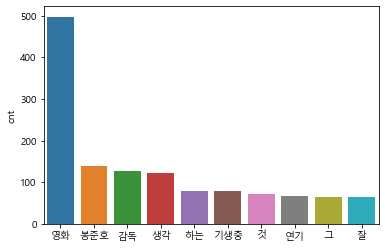

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family = font_name)

sns.barplot(x=df10.index,y='cnt',data=df10)

[과제] 'dataset/영화 기생충_review.txt' 문서를 불러와서 아래 사항을 수행하세요.(20점)
- 정규표현식을 이용해서 한글 단어외 삭제 처리 후 정제된 문서에서 명사만 단어 리스트로 도출 및 단어 빈도 분석
- 'dataset/영화 기생충_사전.txt'를 불러와서 포함되어 있는 인덱스를 기준으로 위에서 도출한 명사 단어들의 빈도를 분석하고 막대 그래프로 시각화


In [8]:
import re
from konlpy.tag import Okt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt

In [9]:
def cleanText(readdata):
    # text = re.sub('[0-9]+','',readdata)
    # text = re.sub('[A-Za-z]+','',text)
    # text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]+','',text)
    text = re.sub('[^가-힣]+',' ',readdata)
    return text

In [10]:
with open('./dataset/영화 기생충_review.txt','r',encoding='cp949') as f:
    data = f.read()
print(data)

별1개  준 사람들은   나베당임
역쉬
영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..
지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!
대단한 영화. 몰입력 장난아님. 후아
그닥
칸하고 안맞나봄.
봉준호식의 코메디와 사회비판 페이소스
좋았습니다
군더더기 없이 깔끔한 영화, 지금도 영화가 주는 메세지를 생각하는 중입니다
볼만 했어요
막 조조보고 나옴. 기가 막힌 블랙코미디. 시간 가는줄 모르고 집중하게 됨..보고 나서 더 생각나는 영화.여지껏 봉준호 영화 중 최고다
전  재미었어요.생각 하게끔 만드는 영화
올만에 한국영화 강추
영화가 끝나고 생각함을 주는영화
이건 진짜 봉준호 천재~~
김태호 무한도전보고 천재라  생각했는데..
다른분야 같은 레벨~!!
더불어 살 순 없을까 ㅠㅠ
블랙코미디 굉장히 찝찝하고 숙연해진다
나름
몰입!
기대하고 갔는데
개인적으로 별로다 
불편하다
시간가는 줄 모르고 정말 재밌게 봤습니다.
풍자를 기가막히게 잘 표현한 것 같습니다.
아마 2019년 최고작
송강호 나오면 무조건 보는데 역시나 믿고 보는 배우 역시 한국인들 대단해 방탄에 이어 영화까지 세계인의 마음을 사로잡다
good
일반국민이던  배충이던  모두봐야할  영화
칸영화제 수상과는 별개로...... 개인적으로 영화가 끝나고 기립박수를 치고 싶었습니다
봉준호 감독님에게 경의를 표하고 싶습니다.
당장은 어렵더라도. 기우의 바램이 이루어지는 세상을 향해.
뉴스로 닿지 않을 것을 전달해내는 과연 봉테일.
묵직하게. 잘 받았습니다, 오버.
두번 다시 봉준호 영화는 거른다..!!
재밌어요~
재미있고 상징적인 상업영화인데
행위예술같은 고급스러움도 있어요~
물론 반지하 장면은 좀 지저분하지만
그게 현실이니까
너무 재밌게 봤고 두번은 더 볼꺼예요~♡♡
오랜만에 잘 만들어진 영화를 봤네요~.
대사 중에 불필요한 ㅇㅅ이 많아서 아쉬웠음
글쎄..........
503  최순실 잔당이 블랙리스트로 말려 죽이려한 감독과 대배우. 그들에게 최고의 명예를 

In [11]:
text = cleanText(data)

okt = Okt()
morph = okt.pos(text)
word_list = []
for word, tag in morph:
    if tag=='Noun':
        word_list.append(word)

In [12]:
from collections import Counter
count = Counter(word_list)
n_words = dict(count.most_common())
print(n_words)

{'영화': 499, '봉준호': 138, '감독': 126, '생각': 122, '기생충': 78, '것': 72, '그': 66, '연기': 66, '보고': 60, '송강호': 60, '현실': 57, '배우': 54, '기대': 54, '작품': 53, '이': 53, '사람': 51, '역시': 48, '더': 47, '최고': 47, '장면': 47, '상': 46, '수': 45, '우리': 44, '봉': 43, '황금종려상': 41, '점': 40, '사회': 37, '시간': 37, '왜': 37, '느낌': 36, '칸': 36, '정말': 35, '스토리': 35, '좀': 34, '냄새': 34, '나': 32, '재미': 32, '부자': 31, '말': 31, '꼭': 29, '볼': 28, '모두': 28, '듯': 28, '이선균': 28, '집': 28, '그냥': 27, '가족': 27, '축하': 27, '인간': 27, '여운': 27, '조여정': 26, '진짜': 25, '다시': 25, '한국': 24, '때': 24, '돈': 24, '몰입': 23, '한번': 23, '임': 22, '함': 22, '또': 22, '이해': 21, '지금': 20, '대한': 19, '장르': 19, '못': 19, '관객': 19, '내용': 19, '마지막': 19, '마음': 18, '수상': 18, '정도': 18, '내내': 18, '부분': 18, '끝': 18, '내': 18, '하나': 18, '관람': 17, '삶': 17, '뭐': 17, '계획': 17, '가지': 17, '저': 17, '기분': 17, '감': 17, '때문': 17, '가슴': 16, '줄': 16, '풍자': 16, '영화제': 16, '살인': 16, '일': 16, '괴물': 16, '속': 16, '이야기': 16, '안': 16, '개봉': 16, '대박': 16, '설국열차': 16, '천재': 15, '개인': 15, '별로'

In [13]:
import pandas as pd
df2 = pd.read_csv('dataset/영화 기생충_사전.txt',encoding='cp949',names=['word'])
df2['freq2'] =1
df2.set_index('word',inplace=True)
df2

,freq2
word,
기생충,1
봉준호,1
송강호,1
기택,1
이선균,1
박사장,1
조여정,1
연교,1
최우식,1


In [14]:
# n_words['박사장']

KeyError: '박사장'

In [15]:
for i in df2.index:
    if i not in n_words:
        df2.loc[i] = 0
    else : df2.loc[i]=n_words[i]

df2.sort_values(by='freq2',ascending=False,inplace=True)
df2

,freq2
word,
봉준호,138
기생충,78
송강호,60
이선균,28
조여정,26
최우식,12
이정은,11
기우,3
기택,1


<AxesSubplot:xlabel='word', ylabel='freq2'>

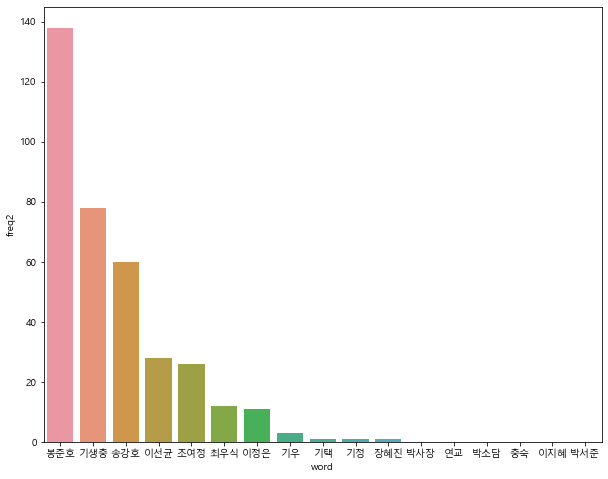

In [16]:
font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family = font_name)
plt.figure(figsize=(10,8))
sns.barplot(x=df2.index,y='freq2',data=df2)

[도전과제]  
'dataset/영화 기생충_review.txt' 문서를 불러와서 아래 사항을 수행하세요.(10점)
- cleanText() 사용자 함수 재활용하여 정제된 문서에서 명사만 단어 리스트로 도출
- 단어 빈도를 도출한 후 워드클라우드로 시각화


In [ ]:
import re
from konlpy.tag import Okt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt

In [1]:
# %pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


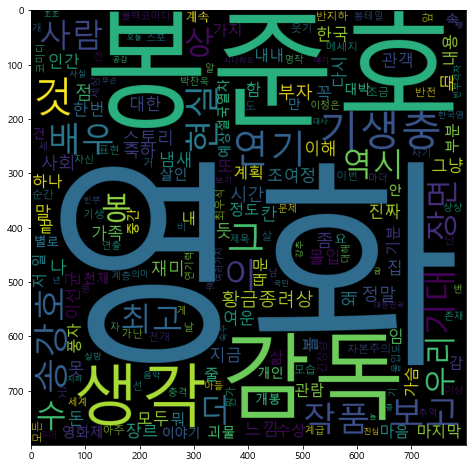

In [21]:
from wordcloud import WordCloud
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(n_words)
plt.figure(figsize=(8,8))
plt.imshow(gen)